In [15]:
import numpy as np 
import lacosmic
from glob import glob
import os
from astropy.io import fits
import astroscrappy
from astropy.visualization import ZScaleInterval, ImageNormalize, SqrtStretch
import matplotlib.pyplot as plt

In [2]:
with open('user_input.txt', 'r') as file:
    lines = file.readlines()

In [3]:
path = lines[0].strip()
src = os.path.join(path,lines[3].strip())

In [4]:
src_data = fits.open(src)[0].data
src_data


array([[  0,   0, 647, ..., 540, 545, 555],
       [548,   0, 637, ..., 558, 560, 555],
       [553,   0, 646, ..., 553, 558, 567],
       ...,
       [551,   0, 646, ..., 536, 551, 545],
       [536,   0, 640, ..., 541, 561, 547],
       [542,   0, 648, ..., 540, 544, 549]], dtype=uint16)

In [10]:
clean_data = astroscrappy.detect_cosmics(src_data, sigclip=4.5, sigfrac = 0.3, objlim = 5.0, gain = 1.22, readnoise=4.8, satlevel= np.inf)[1]

In [18]:
interval = ZScaleInterval()
zscale_min, zscale_max = interval.get_limits(src_data)
norm = ImageNormalize(vmin=zscale_min, vmax=zscale_max, stretch=SqrtStretch())

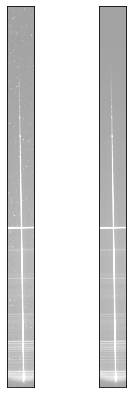

In [24]:
plt.figure(figsize=(3,7))
plt.subplot(1,2,1)
plt.imshow(src_data, norm=norm, cmap='gray', origin='lower')
plt.tick_params(axis='both', labelleft= False, labelbottom = False, left=False, bottom=False)
plt.subplot(1,2,2)
plt.imshow(clean_data, norm=norm, cmap='gray', origin='lower')
plt.tick_params(axis='both', labelleft= False, labelbottom = False, left=False, bottom=False)


plt.show()